In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy -q
%pip install pandas -q
%pip install yfinance -q
%pip install mosek -q
%pip install riskfolio-lib -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [126]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp

# Tickers of assets
tickers = [
    "ABCB4.SA", "ALUP11.SA", "B3SA3.SA", "BRSR6.SA", "BBSE3.SA", "BRAP4.SA", "BBAS3.SA", "AGRO3.SA", "CMIG3.SA",
    "CMIG4.SA", "CSMG3.SA", "CPLE6.SA", "CPFE3.SA", "CMIN3.SA", "CURY3.SA", "DIRR3.SA", "ENAT3.SA", "EGIE3.SA",
    "FESA4.SA", "GGBR4.SA", "GOAU4.SA", "MYPK3.SA", "RANI3.SA", "ITSA4.SA", "JBSS3.SA", "JHSF3.SA", "KEPL3.SA",
    "LAVV3.SA", "MRFG3.SA", "BEEF3.SA", "PETR3.SA", "PETR4.SA", "PSSA3.SA", "RAPT4.SA", "ROMI3.SA", "SANB11.SA",
    "CSNA3.SA", "TAEE11.SA", "VIVT3.SA", "TRPL4.SA", "TRIS3.SA", "UNIP6.SA", "USIM5.SA", "VALE3.SA", "VBBR3.SA"
]

tickers.sort()

# Downloading the data
data = yf.download(tickers, start=start, end=end)
data = data.loc[:, ('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
# Method to estimate expected returns based on historical data.
method_mu = 'hist'
# Method to estimate covariance matrix based on historical data.
method_cov = 'hist'

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm,
                       obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(
    model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

[*********************100%***********************]  45 of 45 completed


In [138]:
w1.sort_values("weights", ascending=False)

,weights
PETR3.SA,32.5183%
CMIG3.SA,18.4078%
CPLE6.SA,12.6776%
RANI3.SA,11.1030%
TAEE11.SA,10.3605%
FESA4.SA,9.1889%
UNIP6.SA,5.7439%
PSSA3.SA,0.0000%
KEPL3.SA,0.0000%
CURY3.SA,0.0000%


### Plot series

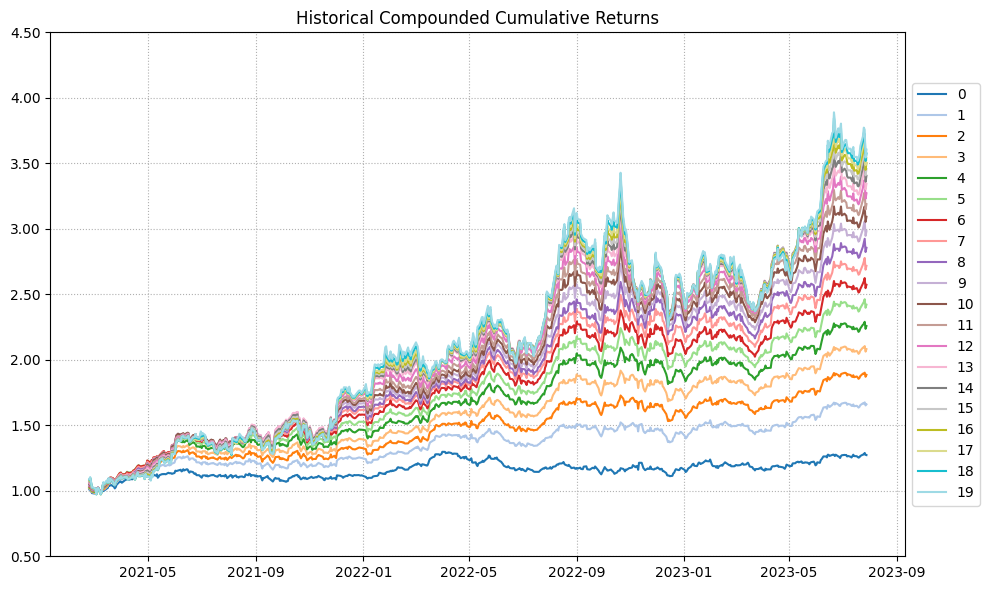

In [128]:
ax = rp.plot_series(returns=Y,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)

### Gráfico de fronteira eficiente a partir de medida de risco especificado pelo usuário

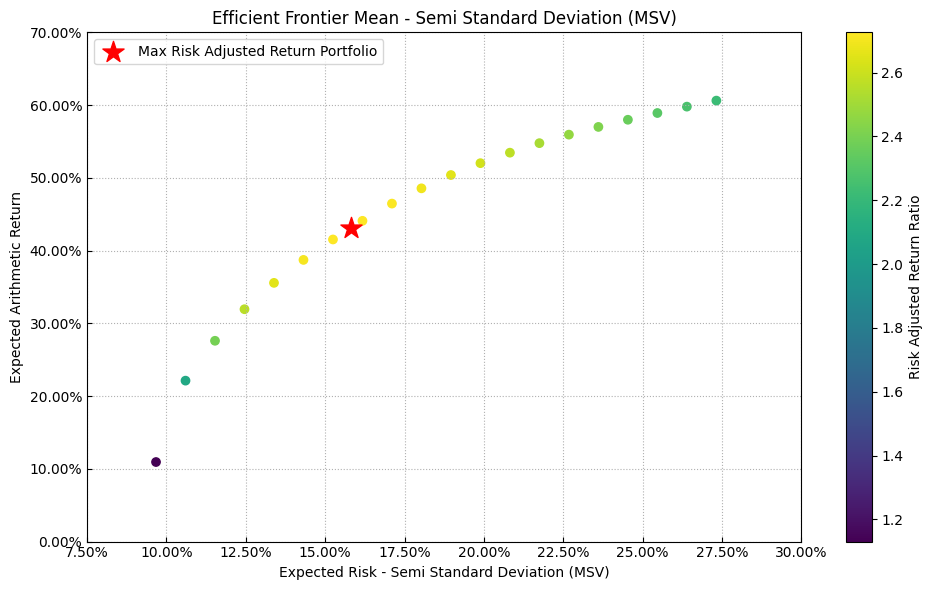

In [129]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w1,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

### Gráfico de pesos por ativo

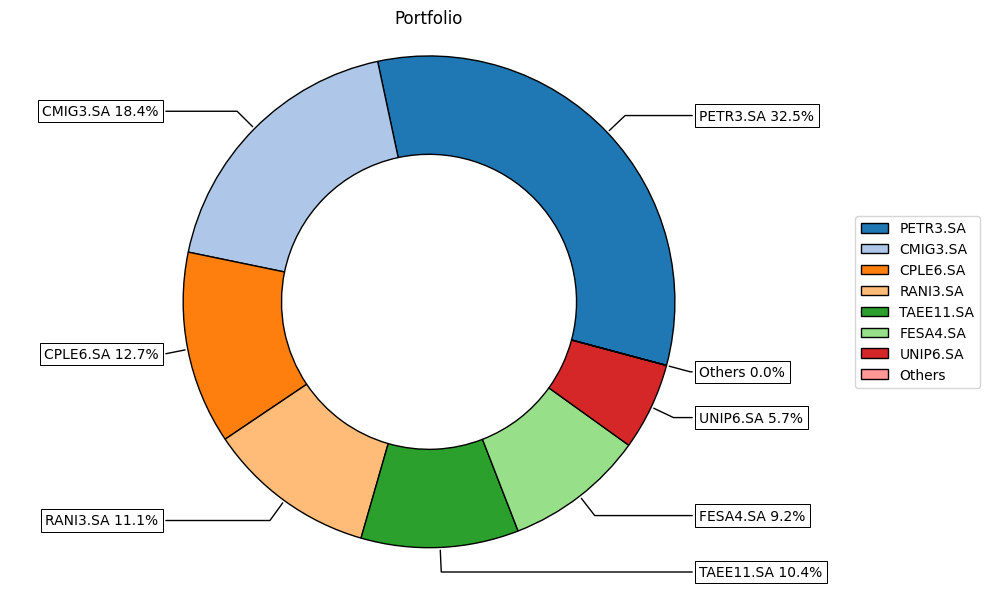

In [130]:
ax = rp.plot_pie(w=w1,
                 title='Portfolio',
                 height=6,
                 width=10,
                 cmap="tab20",
                 ax=None)

### Gráfico de fronteira eficiente

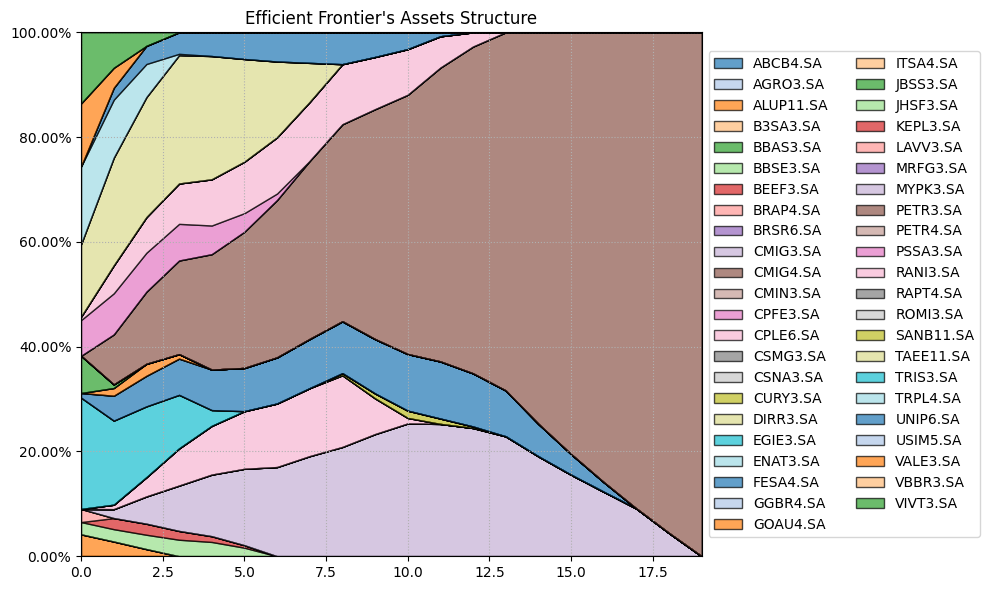

In [131]:
ax = rp.plot_frontier_area(w_frontier=ws,
                           cmap="tab20",
                           height=6,
                           width=10,
                           ax=None)

### Contribuição de risco por ativo

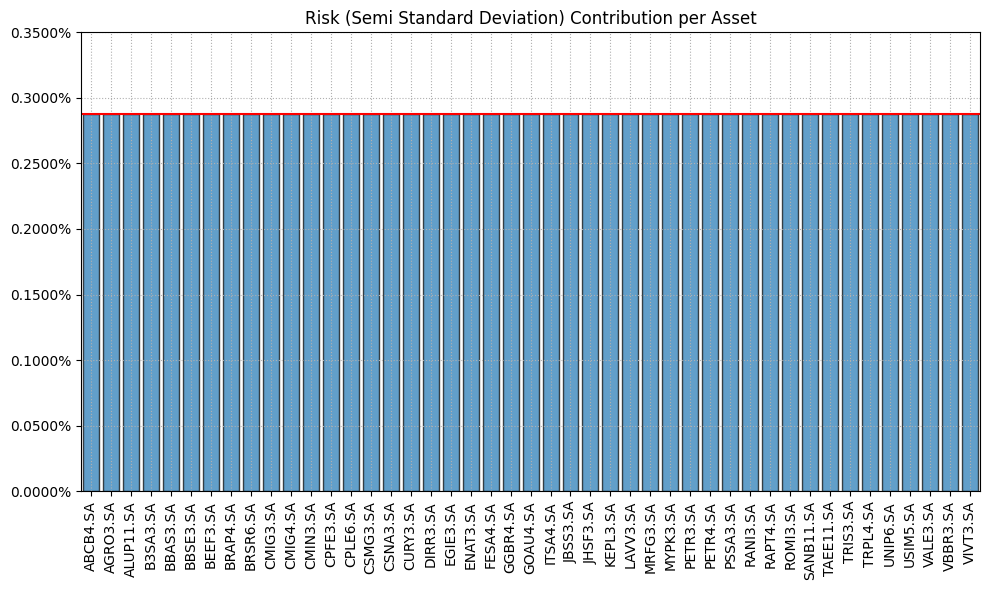

In [132]:
ax = rp.plot_risk_con(w=w2,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)